In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr
sns.set()

# Simple Linear regression
### Load the data

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Create regression

In [3]:
x = data['SAT']
y = data['GPA']
#In ML the independent variable is called the feature/input
#the dependent variable is called the target/output

In [4]:
x.shape

(84,)

In [5]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [6]:
y.shape

(84,)

In [7]:
reg = lr()
#reg is an instance of the LinearRegression class

In [8]:
reg.fit(x_matrix,y)
#order is important, inputs first and then target
#the inputs must be 2D which is why we made the x_matrix

LinearRegression()

In [9]:
reg.get_params()
#We do this since the parameters were not shown in the previous
#output

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

See notes for explanation of parameters

### R-squared

In [10]:
reg.score(x_matrix,y)

0.40600391479679765

### Coefficients

In [11]:
reg.coef_
#This produces an array with all coefficients

array([0.00165569])

### Intercept

In [12]:
reg.intercept_
#This produces a float as this type of regression always has a 
#single intercept

0.275040299660279

### Making predictions

In [13]:
reg.predict([[1740]])
#This returns the predictions of the linear regression model
#for some new inputs

#Make sure the input is 2D!!!

array([3.15593751])

In [14]:
new_data = pd.DataFrame(data=[1740, 1760], columns = ['SAT'])
new_data

,SAT
0,1740
1,1760


In [15]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [16]:
new_data['Predicted GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


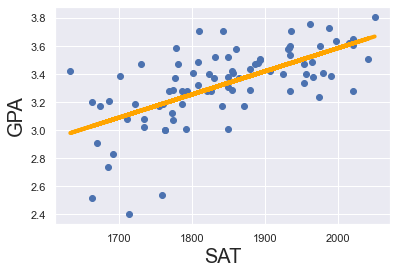

In [17]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_

fig = plt.plot(x, yhat, lw=4, c = 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Multiple linear regression
### Load the data

In [18]:
data = pd.read_csv('1.02. Multiple linear regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [19]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [20]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

In [21]:
reg = lr()
reg.fit(x,y)
#did not need to reshape inputs as sklearn is made for 
#multiple linear regression

LinearRegression()

In [22]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [23]:
reg.intercept_

0.29603261264909353

### Calculating Adjusted R-squared 

In [24]:
reg.score(x,y)

0.4066811952814282

No ready to use method to get the adjusted R-squared in sklearn, to solve this we can google to see if someone has a module we can download to achieve this or we can calculate it mathematically

$$R^2_{adj} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$$

- n = 84 (the number of observations)
- p = 2 (the number of predictors/inputs)

In [25]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]
r2_adj = 1-((1-r2)*(n-1)/(n-p-1))
print(r2_adj)

#Can define function to do this

0.39203134825134


# Feature Selection

In [26]:
from sklearn.feature_selection import f_regression as f_reg

In [27]:
f_reg(x,y)
#First array are the F-stats
#Second arrays are the corresponding p-values

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [28]:
p_values = f_reg(x,y)[1]
p_values
#e-11 = 10**-11

array([7.19951844e-11, 6.76291372e-01])

In [29]:
p_values.round(3)
#This rounds to 3 digits after the decimal place
#which is adequate for p-values

array([0.   , 0.676])

### Note
These are the univariate p-values reached from simple linear models. They do not reflect the interconnection of the features in our multiple linear regression.

These are also not the same p-values as in statsmodels becuase of this

Therefore caution should be taken when analysing F-statistics

### Creating a summary table

In [30]:
reg_summary = pd.DataFrame(data=x.columns.values, columns = ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [31]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


### Feature Selection through Standardization

In [34]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

In [35]:
from sklearn.preprocessing import StandardScaler as ss

In [36]:
scaler = ss()
# this is used to scale our data

In [38]:
scaler.fit(x)
#'fit' calculates and stores the mean and standard deviation of 
#each feature
#Like LinearRegression() this output contains parameters

StandardScaler()

In [39]:
x_scaled = scaler.transform(x)
# this transforms the unscaled variable to a scaled varaible
#using the information we found using scaler.fit(x)

### Regression with scaled features

In [42]:
reg = lr()
reg.fit(x_scaled, y)

LinearRegression()

In [43]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [44]:
reg.intercept_

3.330238095238095

### Creating a summary table

In [48]:
reg_summary = pd.DataFrame([['Bias'], ['SAT'], ['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights']= reg.intercept_, reg.coef_[0], reg.coef_[1]
reg_summary
#Weights is the machine learning word for coefficients
#the bigger the weight, the bigger the impact of the feature
#on the regression
#The ML word for intercept is 'bias'

#Using these new naming conventions we can distinguish between a
#'regular coefficients table' and this new one with 
#standardized weights

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


### Making predictions with standardized weights

In [49]:
new_data = pd.DataFrame(data=[[1700,2], [1800,1]], columns = ['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [50]:
reg.predict(new_data)
# This gives a strange output as these are not even valid GPAs!
# We must remember that our trained inputs were x_scaled
# So our model expects values that are of the same magnitude

array([295.39979563, 312.58821497])

In [51]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [52]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

### What if we removed the Rand 1,2,3

In [54]:
reg_simple = lr()
x_simple_matrix = x_scaled[:,0].reshape(-1,1)
reg_simple.fit(x_simple_matrix, y)

LinearRegression()

In [55]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

# Train/Test Split

In [56]:
from sklearn.model_selection import train_test_split as tts

### Generate some data

In [58]:
a = np.arange(1,101)

In [59]:
b = np.arange(501, 601)

### Split the data

In [88]:
a_train, a_test, b_train, b_test = tts(a, b, test_size = 0.2, shuffle = True, random_state = 42)
# assigns the training array to a_train 
# and the test array to a_test

#Sometimes (particularly in time series data) the order of the 
#array is really important
#setting shuffle=False fixes this

#tts will also accomodate more than one array at a time 
#so we can also split b here too

### Explore the result

In [89]:
a_train.shape, a_test.shape
# The default split is 75/25
# Adding the test_size parameter allows us to set it to 80/20

((80,), (20,))

In [90]:
a_train
# Both arrays are shuffled which is again the default of tts

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [91]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

In [92]:
b_train.shape, b_test.shape

((80,), (20,))

In [95]:
b_train
# a consists of the numbers from 1 to 100 and b consists of the
#numbers from 501 to 600
#So we can say 1 from a, matches with 501 from b, etc.
#When we split a and b using tts, their elements are shuffled
#in the same way, this is clear when examining a_train and b_train

array([556, 589, 527, 543, 570, 516, 541, 597, 510, 573, 512, 548, 586,
       529, 594, 506, 567, 566, 536, 517, 550, 535, 508, 596, 528, 520,
       582, 526, 563, 514, 525, 504, 518, 539, 509, 579, 507, 565, 537,
       590, 557, 600, 555, 544, 551, 568, 547, 569, 562, 598, 580, 542,
       559, 549, 599, 558, 576, 533, 595, 560, 564, 585, 538, 530, 502,
       553, 522, 503, 524, 588, 592, 575, 587, 583, 521, 561, 572, 515,
       593, 552])

In [94]:
b_test

array([584, 554, 571, 546, 545, 540, 523, 581, 511, 501, 519, 531, 574,
       534, 591, 505, 577, 578, 513, 532])

Every time we run the code we get a different split, so we get a different training set, this won't affect the model by much overall. The R-squared is likely to change by 1 or 2% just because of the split.

Ideally we would like to have shuffled data, but shuffled in the same way every time. **random_state = 42** preserves the shuffled data we have (42 because internet joke), to change the shuffle, just set random_state equal to a different number